In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

sys.path.append("../")
from timescale.read_data import load_data, recalculate_slice
from timescale.constants import *

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  "font.size":    14.0
})

import json
with open("../data/planets.json") as f:
  planets = json.load(f)

In [2]:
def peri_curve(q, e_array):
    return q / (1 - e_array)

def ap_curve(Q, e_array):
    return Q / (1 + e_array)

def add_curves(ax, q, c="black", label = -1, target_e = 0):
    if(label == -1): label = f"{q} AU"
    e_array = np.linspace(0, .9999999, 10000)
    ax.plot(e_array, peri_curve(q * (1+ target_e), e_array), c, label = label )
    ax.plot(e_array, ap_curve(q * (1 - target_e), e_array), c)
    
def plot_frame(ax, data, t, legend = True, text_loc=(0.05, 0.05), target="3"):

    color = get_color(data, t, target=target)
    cbar = ax.scatter(data[t,:,1], data[t,:,0]/AU, marker="+", c=color, cmap="plasma")
    add_curves(ax, 1.524, "r:", label = "Mars", target_e = planets["4"]["eccentricity"])
    add_curves(ax, 1.0, "b-.", label = "Earth")
    add_curves(ax, .723, "y--", label = "Venus")

    exponent = int(np.log10(t*5000))
    decimal = "{:.1f}".format(t*5000 / (10 ** exponent))

    ax.text(text_loc[0], text_loc[1], 
            rf"$t = {decimal} \times 10^{exponent}$ years")
    if(legend):
        ax.legend()
    return cbar

def get_color(data, t, target = "3"):
    return recalculate_slice(data[t,:,:], target)
    

def plot_panels(data, target="3"):
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10,5))
    
    for i in range(len(axs)):
        axs[i].set_xlim((0,1))
        axs[i].set_xlabel("Eccentricity")
        axs[0].set_ylabel("a (AU)")
        axs[i].set_ylim((0,3))
    # ax = plt.axes(xlim=(0, 1), ylim=(0, 3))

    plot_frame(axs[0], data, 2, target=target)
    plot_frame(axs[1], data, 20, legend=False, target=target)
    cbar = plot_frame(axs[2], data, 200, legend=False, target=target)
    fig.colorbar(cbar)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


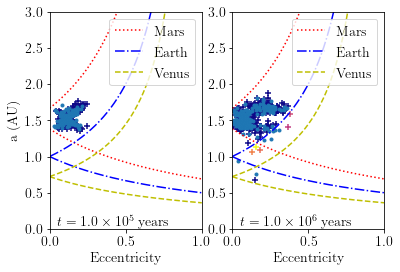

In [3]:
data = load_data(1000, 99, path = "../output/")
fig, axs = plt.subplots(1, 2)
plot_frame(axs[0], data, 20, target = "3")
gladman = np.genfromtxt('../data/1e5.csv',delimiter=',',
                              skip_header=1)
axs[0].scatter(gladman[:, 0], gladman[:, 1], marker = ".")

plot_frame(axs[1], data, 200, target = "3")
gladman = np.genfromtxt('../data/1e6.csv',delimiter=',',
                              skip_header=1)
axs[1].scatter(gladman[:, 0], gladman[:, 1], marker = ".")


for i in range(len(axs)):
    axs[i].set_xlim((0,1))
    axs[i].set_xlabel("Eccentricity")
    axs[0].set_ylabel("a (AU)")
    axs[i].set_ylim((0,3))

plt.savefig("../figures/mars_a_v_e.eps")
plt.show()




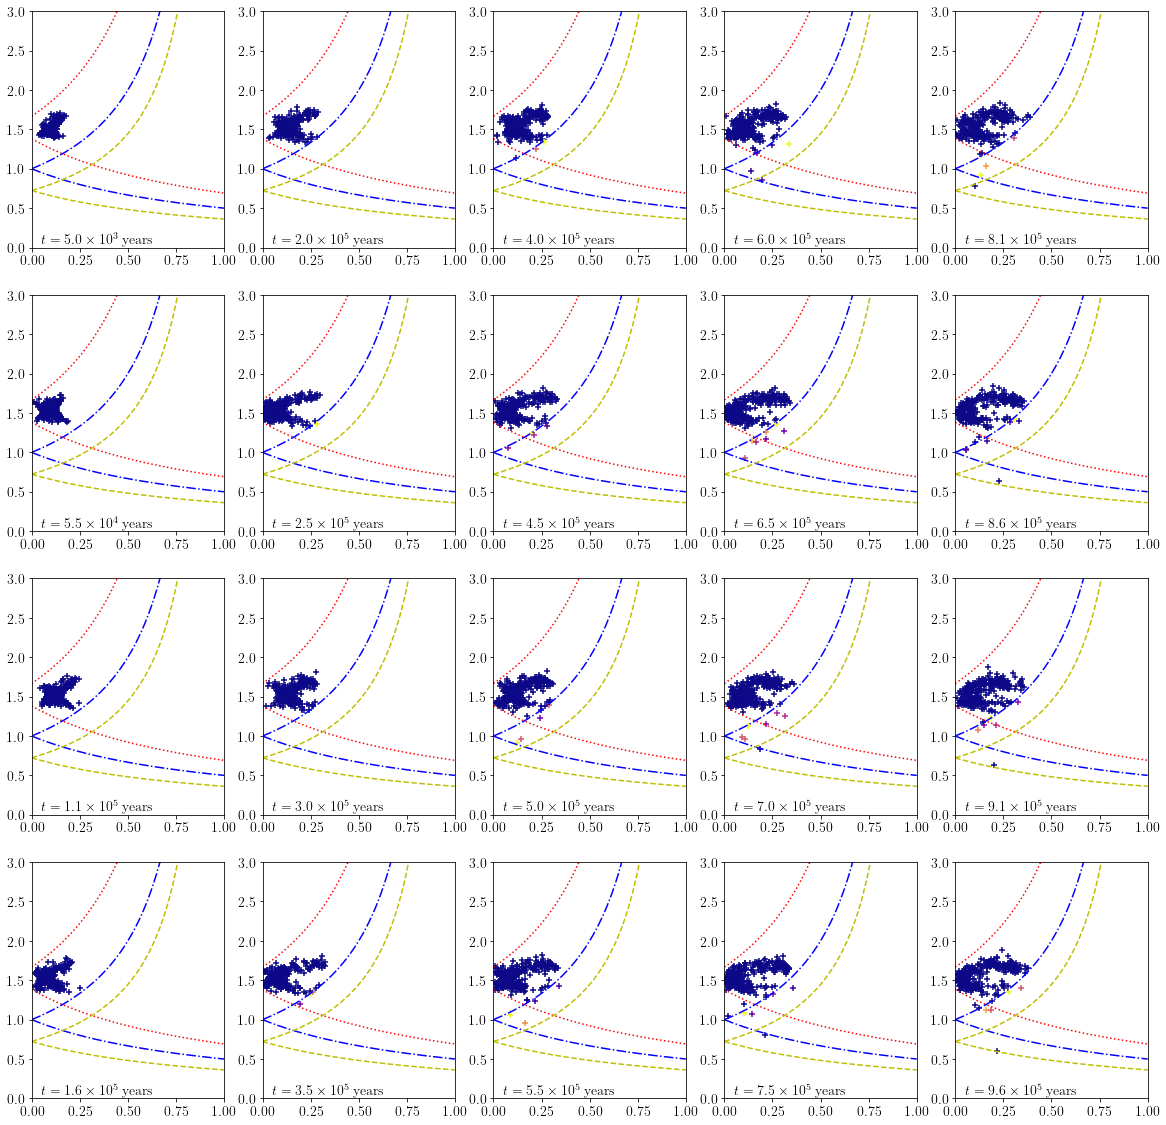

In [4]:
data = load_data(1000, 99, path = "../output/")
dim = [5, 4]
fig, axs = plt.subplots(dim[1], dim[0], figsize = (20,20))
for x in range(dim[1]):
    for y in range(dim[0]):
        t = int(200 / (dim[1] * dim[0])) * (x + y*dim[1]) + 1
        plot_frame(axs[x][y], data, t, legend = False, target="3")
        axs[x][y].set_xlim((0,1))
        axs[x][y].set_ylim((0,3))





The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


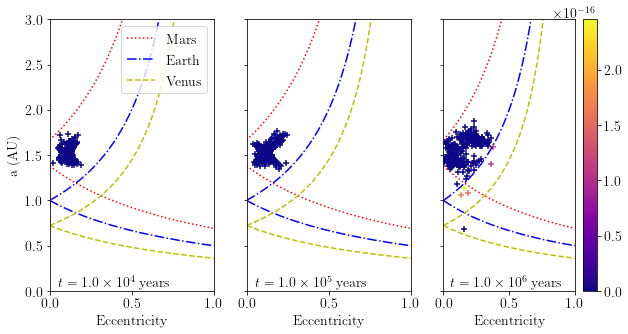

In [6]:
data = load_data(1000, 99, path = "../output/")
plot_panels(data, target="3")
plt.savefig("../figures/mars_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


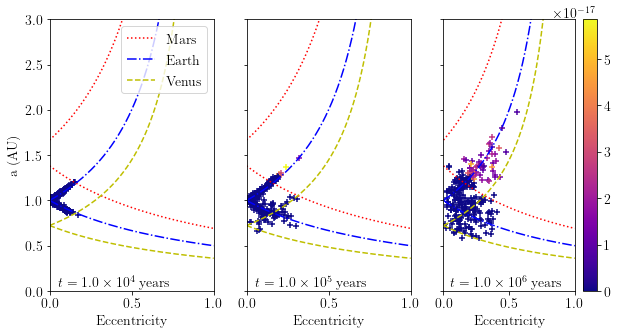

In [7]:
data = load_data(1000, 1, path = "../output/")
plot_panels(data, target = "4")
plt.savefig("../figures/earth1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


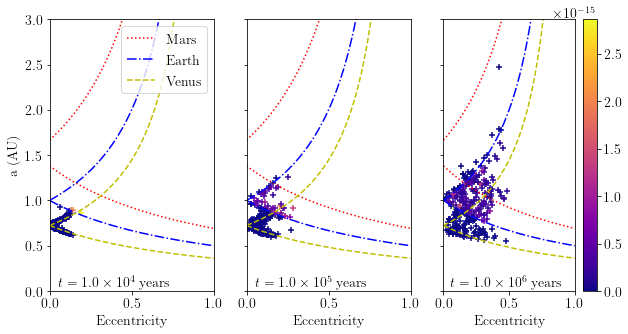

In [8]:
data = load_data(1000, 2, path = "../output/")
plot_panels(data, target = "3")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


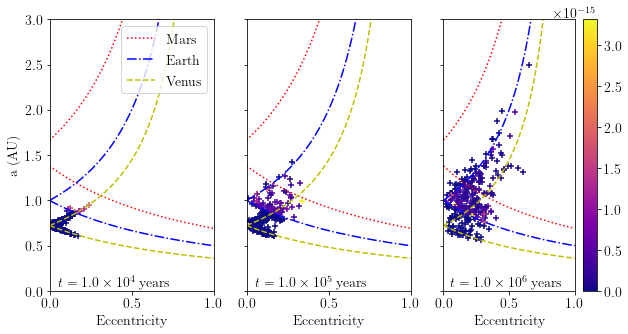

In [9]:
data = load_data(2000, 3, path = "../output/")
plot_panels(data, target = "3")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


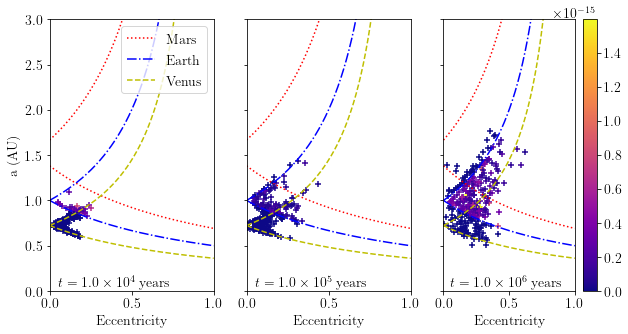

In [10]:
data = load_data(3000, 3, path = "../output/")
plot_panels(data, target = "3")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


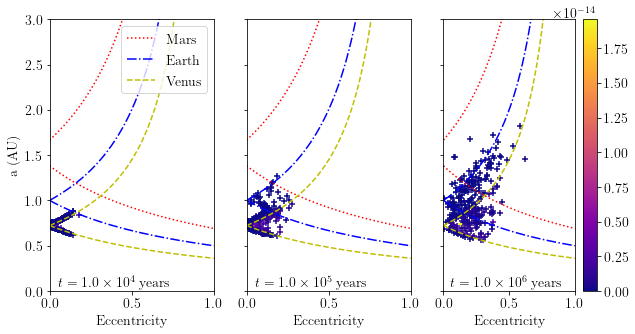

In [11]:
data = load_data(0, 4, path = "../output/")
plot_panels(data, target = "2")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


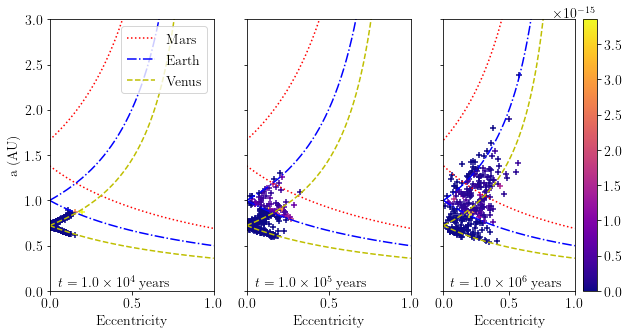

In [12]:
data = load_data(0, 5, path = "../output/")
plot_panels(data, target = "3")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


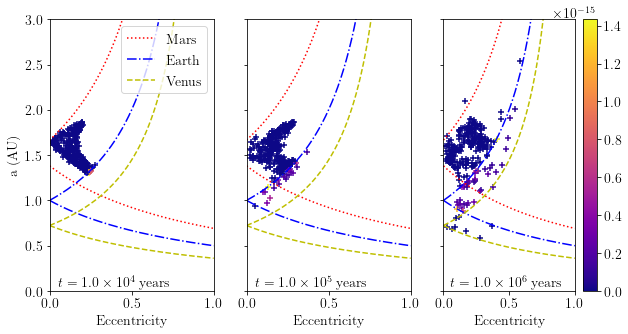

In [13]:
data = load_data(2300, 423, path = "../output/")
plot_panels(data, target = "3")
plt.savefig("../figures/1kms_a_v_e.eps")
plt.show()